<a href="https://colab.research.google.com/github/ElwinGao4444/colab/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas介绍
(官方文档：https://pandas.pydata.org/docs/)

In [ ]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 基础数据结构与用法

## Series

### Series初始化

In [ ]:
print('使用list初始化：\n', pd.Series(['a','b','c']))
print('使用ndarray初始化：\n', pd.Series(data=np.array(['a','b','c'])))
print('初始化并指定索引：\n', pd.Series(data=['a','b','c'], index=[1,2,3]))
print('索引可以是任意类型：\n', pd.Series(data=[1,2,3], index=['a','b','c']))

使用list初始化：
 0    a
1    b
2    c
dtype: object
使用ndarray初始化：
 0    a
1    b
2    c
dtype: object
初始化并指定索引：
 1    a
2    b
3    c
dtype: object
索引可以是任意类型：
 a    1
b    2
c    3
dtype: int64


### Series索引操作

In [ ]:
s1 = pd.Series(['a','b','c'])
s2 = pd.Series(data=[1,2,3], index=['a','b','c'])
print('索引下标取值：', s1[0])
print('索引下标批量取值：\n', s1[[0,2]]) # 类似numpy的用法
print('索引下标切片取值（位置索引）：\n', s1[1:2])  # 位置索引是左闭右开区间
print('索引下标切片取值（值索引）：\n', s2['b':'c']) # 值索引是左右闭区间
print('获取索引值列表：', s1.index, s2.index)

索引下标取值： a
索引下标批量取值：
 0    a
2    c
dtype: object
索引下标切片取值（位置索引）：
 1    b
dtype: object
索引下标切片取值（值索引）：
 b    2
c    3
dtype: int64
获取索引值列表： RangeIndex(start=0, stop=3, step=1) Index(['a', 'b', 'c'], dtype='object')


### Series时序数据

In [ ]:
s1 = pd.Series(np.arange(10), index=pd.date_range(datetime(2020,1,1,0,0,0), periods=10, freq='s'))
s2 = pd.Series(np.arange(10), index=pd.date_range('2020-01-01 00:00:00', periods=10, freq='s'))

print('以时序数据为索引生成Series（datetime初始化）：\n', s1)
print('以时序数据为索引生成Series（字符串初始化）：\n', s2)

以时序数据为索引生成Series（datetime初始化）：
 2020-01-01 00:00:00    0
2020-01-01 00:00:01    1
2020-01-01 00:00:02    2
2020-01-01 00:00:03    3
2020-01-01 00:00:04    4
2020-01-01 00:00:05    5
2020-01-01 00:00:06    6
2020-01-01 00:00:07    7
2020-01-01 00:00:08    8
2020-01-01 00:00:09    9
Freq: S, dtype: int64
以时序数据为索引生成Series（字符串初始化）：
 2020-01-01 00:00:00    0
2020-01-01 00:00:01    1
2020-01-01 00:00:02    2
2020-01-01 00:00:03    3
2020-01-01 00:00:04    4
2020-01-01 00:00:05    5
2020-01-01 00:00:06    6
2020-01-01 00:00:07    7
2020-01-01 00:00:08    8
2020-01-01 00:00:09    9
Freq: S, dtype: int64


## DataFrame

### DataFrame初始化

In [ ]:
# 使用二维list进行初始化
data = [['a',1,1.1], ['b',2,2.2], ['c',3,3.3]]
columns = ['name', 'age', 'score']
df = pd.DataFrame(data=data, columns=columns)
print('直接初始化一个DataFrame：\n', df)

直接初始化一个DataFrame：
   name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3


In [ ]:
# 使用dict+list进行初始化
data = {
    'name': ['a', 'b', 'c'],
    'age': [1, 2, 3],
    'score': [1.1, 2.2, 3.3],
}
df = pd.DataFrame(data)
print('使用字典初始化一个DataFrame：\n', df)

使用字典初始化一个DataFrame：
   name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3


In [ ]:
# 使用list+dict进行初始化（配合数据库的常用方式）
data = [
    {'name':'a', 'age':1, 'score':1.1},
    {'name':'b', 'age':2, 'score':2.2},
    {'name':'c', 'age':3, 'score':3.3},
    ]
df = pd.DataFrame(data)
print('使用字典数组初始化一个DataFrame：\n', df)

使用字典数组初始化一个DataFrame：
   name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3


In [ ]:
# 使用dict+Series进行初始化
data = {
    'c0': pd.Series(data=[1,2,3], index=['r0','r1','r2']),
    'c1': pd.Series(data=[2,3,4], index=['r0','r1','r2']),
    'c2': pd.Series(data=[3,4,5], index=['r0','r1','r2']),
}
df = pd.DataFrame(data)
print('使用Series数组初始化一个DataFrame：\n', df)

使用Series数组初始化一个DataFrame：
     c0  c1  c2
r0   1   2   3
r1   2   3   4
r2   3   4   5


### DataFrame重要属性

In [ ]:
data = [['a',1,1.1], ['b',2,2.2], ['c',3,3.3]]
columns = ['name', 'age', 'score']
df = pd.DataFrame(data=data, columns=columns)

print('df.values：', df.values)
print('df.dtypes：', df.dtypes)
print('df.index：', df.index)
print('df.columns：', df.columns)
print('df.T：', df.T)
print('df.shape：', df.shape)
print('df.info：', df.info)

df.values： [['a' 1 1.1]
 ['b' 2 2.2]
 ['c' 3 3.3]]
df.dtypes： name      object
age        int64
score    float64
dtype: object
df.index： RangeIndex(start=0, stop=3, step=1)
df.columns： Index(['name', 'age', 'score'], dtype='object')
df.T：          0    1    2
name     a    b    c
age      1    2    3
score  1.1  2.2  3.3
df.shape： (3, 3)
df.info： <bound method DataFrame.info of   name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3>


### DataFrame重要函数

In [ ]:
data = [['a',1,1.1], ['b',2,2.2], ['c',3,3.3]]
columns = ['name', 'age', 'score']
df = pd.DataFrame(data=data, columns=columns)

print('df.describe()：', df.describe())
print('df.count()：', df.count())
print('df.sum()：', df.sum())
print('df.min()：', df.min())
print('df.max()：', df.max())

df.describe()：        age  score
count  3.0   3.00
mean   2.0   2.20
std    1.0   1.10
min    1.0   1.10
25%    1.5   1.65
50%    2.0   2.20
75%    2.5   2.75
max    3.0   3.30
df.count()： name     3
age      3
score    3
dtype: int64
df.sum()： name     abc
age        6
score    6.6
dtype: object
df.min()： name       a
age        1
score    1.1
dtype: object
df.max()： name       c
age        3
score    3.3
dtype: object


# 常用库函数

## Series数据提取

In [ ]:
s = pd.Series(np.arange(10), index=['s0','s1','s2','s3','s4','s5','s6','s7','s8','s9',])
print('通过下标直接选取：', s[0])
print('通过下标批量选取：\n', s[[0,2,4,6]])
print('通过下标选取切片：\n', s[0:5])

print('通过名字直接选取：', s['s0'])
print('通过下标批量选取：\n', s[['s0','s2','s4','s6']])
print('通过下标选取切片：\n', s['s0':'s5'])

print('通过条件选取：\n', s[s>5])

通过下标直接选取： 0
通过下标批量选取：
 s0    0
s2    2
s4    4
s6    6
dtype: int64
通过下标选取切片：
 s0    0
s1    1
s2    2
s3    3
s4    4
dtype: int64
通过名字直接选取： 0
通过下标批量选取：
 s0    0
s2    2
s4    4
s6    6
dtype: int64
通过下标选取切片：
 s0    0
s1    1
s2    2
s3    3
s4    4
s5    5
dtype: int64
通过条件选取：
 s6    6
s7    7
s8    8
s9    9
dtype: int64


## DataFrame数据提取

### 按行提取

In [ ]:
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])

print('使用下标提取切片：\n', df['r0':'r2'])  # 不懂为什么只有切片设计成行提取
print('使用下标提取切片（索引）：\n', df[0:2])

print('使用loc通过行名进行提取：\n', df.loc['r0'])
print('使用loc通过行名提取多行：\n', df.loc[['r0','r2']])
print('使用loc通过行名提取切片：\n', df.loc['r0':'r2']) # 闭区间

print('使用iloc通过行编号进行提取：\n', df.iloc[0])
print('使用iloc通过行编号提取多行：\n', df.iloc[[0,2]])
print('使用iloc通过行编号提取切片：\n', df.iloc[0:2])  # 左闭右开区间

使用下标提取切片：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r0   0   1   2   3   4   5   6   7   8   9
r1  10  11  12  13  14  15  16  17  18  19
r2  20  21  22  23  24  25  26  27  28  29
使用下标提取切片（索引）：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r0   0   1   2   3   4   5   6   7   8   9
r1  10  11  12  13  14  15  16  17  18  19
使用loc通过行名进行提取：
 c0    0
c1    1
c2    2
c3    3
c4    4
c5    5
c6    6
c7    7
c8    8
c9    9
Name: r0, dtype: int64
使用loc通过行名提取多行：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r0   0   1   2   3   4   5   6   7   8   9
r2  20  21  22  23  24  25  26  27  28  29
使用loc通过行名提取切片：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r0   0   1   2   3   4   5   6   7   8   9
r1  10  11  12  13  14  15  16  17  18  19
r2  20  21  22  23  24  25  26  27  28  29
使用iloc通过行编号进行提取：
 c0    0
c1    1
c2    2
c3    3
c4    4
c5    5
c6    6
c7    7
c8    8
c9    9
Name: r0, dtype: int64
使用iloc通过行编号提取多行：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r0   0   1   2   3   4   5   6   7   8 

### 按列提取

In [ ]:
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])
print('使用成员变量方式提取：\n', df.c0)
print('使用下标提取列：\n', df['c0'])
print('提取行可以用下标和名字两种方式，而提取列只能用名字')
print('使用下标提取多列：\n', df[['c0','c1']])
print('使用下标提取切片改成了行操作，有点匪夷所思')

# df.loc[<行>,<列>] 通过逗号分割来表达行与列
print('使用loc通过列名进列提取：\n', df.loc[:,'c0'])
print('使用loc通过列名提取多列：\n', df.loc[:,['c0','c2']])
print('使用loc通过列名提取切片：\n', df.loc[:,'c0':'c2']) # 闭区间

print('使用iloc通过列编号进列提取：\n', df.iloc[:,0])
print('使用iloc通过列编号提取多列：\n', df.iloc[:,[0,2]])
print('使用iloc通过列编号提取切片：\n', df.iloc[:,0:2])  # 左闭右开区间

使用成员变量方式提取：
 r0     0
r1    10
r2    20
r3    30
r4    40
r5    50
r6    60
r7    70
r8    80
r9    90
Name: c0, dtype: int64
使用下标提取列：
 r0     0
r1    10
r2    20
r3    30
r4    40
r5    50
r6    60
r7    70
r8    80
r9    90
Name: c0, dtype: int64
提取行可以用下标和名字两种方式，而提取列只能用名字
使用下标提取多列：
     c0  c1
r0   0   1
r1  10  11
r2  20  21
r3  30  31
r4  40  41
r5  50  51
r6  60  61
r7  70  71
r8  80  81
r9  90  91
使用下标提取切片改成了行操作，有点匪夷所思
使用loc通过列名进列提取：
 r0     0
r1    10
r2    20
r3    30
r4    40
r5    50
r6    60
r7    70
r8    80
r9    90
Name: c0, dtype: int64
使用loc通过列名提取多列：
     c0  c2
r0   0   2
r1  10  12
r2  20  22
r3  30  32
r4  40  42
r5  50  52
r6  60  62
r7  70  72
r8  80  82
r9  90  92
使用loc通过列名提取切片：
     c0  c1  c2
r0   0   1   2
r1  10  11  12
r2  20  21  22
r3  30  31  32
r4  40  41  42
r5  50  51  52
r6  60  61  62
r7  70  71  72
r8  80  81  82
r9  90  91  92
使用iloc通过列编号进列提取：
 r0     0
r1    10
r2    20
r3    30
r4    40
r5    50
r6    60
r7    70
r8    80
r9    90
Name: c0, dtype:

### 区域提取

In [ ]:
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])
print('直接下标提取：', df['c0']['r0'])
print('使用连续下标访问时，要特别注意每一层的返回值到底时DataFrame还是Series')

print('使用loc提取：', df.loc['r0','c0'])
print('使用loc批量提取：\n', df.loc[['r0','r2'],['c0','c2']])
print('使用loc提取切片：\n', df.loc['r0':'r2','c0':'c2'])

print('使用iloc提取：', df.iloc[0,0])
print('使用iloc批量提取：\n', df.iloc[[0,2],[0,2]])
print('使用iloc提取切片：\n', df.iloc[0:2,0:2])

直接下标提取： 0
使用连续下标访问时，要特别注意每一层的返回值到底时DataFrame还是Series
使用loc提取： 0
使用loc批量提取：
     c0  c2
r0   0   2
r2  20  22
使用loc提取切片：
     c0  c1  c2
r0   0   1   2
r1  10  11  12
r2  20  21  22
使用iloc提取： 0
使用iloc批量提取：
     c0  c2
r0   0   2
r2  20  22
使用iloc提取切片：
     c0  c1
r0   0   1
r1  10  11


### 指定条件提取

In [ ]:
# DataFrame的条件选取主要都是以列为条件（因为通常不同列的元素类型不同）
# 如果想做针对行的选取，可以通过转置来进行
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])
print('直接条件提取：\n', df[df['c0']>50])
print('组合条件提取（逻辑与）：\n', df.loc[(df['c0']>50)&(df['c2']//10%2==0)])
print('组合条件提取（逻辑非）：\n', df.loc[~(df['c0']>50)])
print('组合条件提取（过滤非法值）：\n', df[~df.isin([np.nan, np.inf, -np.inf])])

直接条件提取：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r6  60  61  62  63  64  65  66  67  68  69
r7  70  71  72  73  74  75  76  77  78  79
r8  80  81  82  83  84  85  86  87  88  89
r9  90  91  92  93  94  95  96  97  98  99
组合条件提取：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r6  60  61  62  63  64  65  66  67  68  69
r8  80  81  82  83  84  85  86  87  88  89


## DataFrame的遍历

### 按行遍历

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])
for index, row in df.iterrows():
  print('按行遍历：', index, row)
for row in df.itertuples(): # 相比iterrows效率更高
  print('按行遍历（元祖形式）：', row)

按行遍历： r0 c0    0
c1    1
c2    2
Name: r0, dtype: int64
按行遍历： r1 c0    3
c1    4
c2    5
Name: r1, dtype: int64
按行遍历： r2 c0    6
c1    7
c2    8
Name: r2, dtype: int64
按行遍历（元祖形式）： Pandas(Index='r0', c0=0, c1=1, c2=2)
按行遍历（元祖形式）： Pandas(Index='r1', c0=3, c1=4, c2=5)
按行遍历（元祖形式）： Pandas(Index='r2', c0=6, c1=7, c2=8)


### 按列遍历

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])
for index, row in df.iteritems():
  print('按列遍历：', index, row)
for index, row in df.items():
  print('按列遍历：', index, row)

按列遍历： c0 r0    0
r1    3
r2    6
Name: c0, dtype: int64
按列遍历： c1 r0    1
r1    4
r2    7
Name: c1, dtype: int64
按列遍历： c2 r0    2
r1    5
r2    8
Name: c2, dtype: int64
按列遍历： c0 r0    0
r1    3
r2    6
Name: c0, dtype: int64
按列遍历： c1 r0    1
r1    4
r2    7
Name: c1, dtype: int64
按列遍历： c2 r0    2
r1    5
r2    8
Name: c2, dtype: int64


<ipython-input-16-af2eb69f6c34>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df.iteritems():


## Series数据增删

In [ ]:
# Series数据追加
s1 = pd.Series(np.arange(3), index=['s0','s1','s2'])
s2 = pd.Series(np.arange(3), index=['s3','s4','s5'])
print('Series数据追加(deprecated)\n', s1.append(s2))
print('Series数据追加 : \n', pd.concat([s1,s2]))

Series数据追加(deprecated)
 s0    0
s1    1
s2    2
s3    0
s4    1
s5    2
dtype: int64
Series数据追加 : 
 s0    0
s1    1
s2    2
s3    0
s4    1
s5    2
dtype: int64


<ipython-input-18-73cc6c9c3c10>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print('Series数据追加(deprecated)\n', s1.append(s2))


## DataFrame数据增删

### 按行增加数据

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df.loc['r4'] = [7,7,7]
print('使用loc指定列的方式追加列：\n', df)

# append方法已不再被推荐使用，推荐使用concat方法
print('使用append方法批量追加列：\n', df.append(pd.DataFrame(np.zeros(9).reshape(3,3), columns=['c0','c1','c2']), ignore_index=True))

使用loc指定列的方式追加列：
     c0  c1  c2
r0   0   1   2
r1   3   4   5
r2   6   7   8
r4   7   7   7
使用append方法批量追加列：
     c0   c1   c2
0  0.0  1.0  2.0
1  3.0  4.0  5.0
2  6.0  7.0  8.0
3  7.0  7.0  7.0
4  0.0  0.0  0.0
5  0.0  0.0  0.0
6  0.0  0.0  0.0


<ipython-input-19-67130c6c5c00>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print('使用append方法批量追加列：\n', df.append(pd.DataFrame(np.zeros(9).reshape(3,3), columns=['c0','c1','c2']), ignore_index=True))


### 按列增加数据

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df['c3'] = [6,6,6]
print('使用直接赋值的方式追加列：\n', df)

df.loc[:,'c4'] = [7,7,7]
print('使用loc指定列的方式追加列：\n', df)

df.insert(4, 'c5', [8,8,8])
print('使用insert方式插入列：\n', df)

使用直接赋值的方式追加列：
     c0  c1  c2  c3
r0   0   1   2   6
r1   3   4   5   6
r2   6   7   8   6
使用loc指定列的方式追加列：
     c0  c1  c2  c3  c4
r0   0   1   2   6   7
r1   3   4   5   6   7
r2   6   7   8   6   7
使用insert方式插入列：
     c0  c1  c2  c3  c5  c4
r0   0   1   2   6   8   7
r1   3   4   5   6   8   7
r2   6   7   8   6   8   7


### 批量增加数据

In [ ]:
df1 = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])
df2 = pd.DataFrame(np.zeros(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

# 注意合并两个df的时候，只有行/列名称相同才能追加
print('批量增加行：', pd.concat([df1,df2], axis=0, ignore_index=True))
print('批量增加列：', pd.concat([df1,df2], axis=1, ignore_index=True))

批量增加行：     c0   c1   c2
0  0.0  1.0  2.0
1  3.0  4.0  5.0
2  6.0  7.0  8.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0
5  0.0  0.0  0.0
批量增加列：     0  1  2    3    4    5
r0  0  1  2  0.0  0.0  0.0
r1  3  4  5  0.0  0.0  0.0
r2  6  7  8  0.0  0.0  0.0


### 修改数据

#### 修改标题

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df.index = ['x0', 'x1', 'x2']
print('通过index成员修改行标题：\n', df)
df.columns = ['y0', 'y1', 'y2']
print('通过columns成员修改列标题：\n', df)

通过index成员修改行标题：
     c0  c1  c2
x0   0   1   2
x1   3   4   5
x2   6   7   8
通过columns成员修改列标题：
     y0  y1  y2
x0   0   1   2
x1   3   4   5
x2   6   7   8


In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df.rename({'r0':'x0','r1':'x1','r2':'x2'}, inplace=True, axis=0)
print('通过rename方法修改行标题：\n', df)
df.rename({'c0':'y0','c1':'y1','c2':'y2'}, inplace=True, axis=1)
print('通过rename方法修改列标题：\n', df)

通过rename方法修改行标题：
     c0  c1  c2
x0   0   1   2
x1   3   4   5
x2   6   7   8
通过rename方法修改列标题：
     y0  y1  y2
x0   0   1   2
x1   3   4   5
x2   6   7   8


In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df.rename(columns={'c0':'y0','c1':'y1','c2':'y2'}, index={'r0':'x0','r1':'x1','r2':'x2'}, inplace=True)
print('通过rename方法同时修改行列标题：\n', df)

通过rename方法同时修改行列标题：
     y0  y1  y2
x0   0   1   2
x1   3   4   5
x2   6   7   8


#### 修改内容

In [ ]:
# 定点修改
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df['c0']['r0'] = 10
print('指定位置修改：\n', df)

指定位置修改：
     c0  c1  c2
r0  10   1   2
r1   3   4   5
r2   6   7   8


In [ ]:
# 修改行
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df.loc['r0'] = [6,6,6]
print('通过loc整行修改：\n', df)
df.loc['r0',['c0','c2']] = [7,7]
print('通过loc整行批量修改：\n', df)
df.iloc[0,1:] = [8,8]
print('通过iloc切片修改：\n', df)

通过loc整行修改：
     c0  c1  c2
r0   6   6   6
r1   3   4   5
r2   6   7   8
通过loc整行批量修改：
     c0  c1  c2
r0   7   6   7
r1   3   4   5
r2   6   7   8
通过iloc切片修改：
     c0  c1  c2
r0   7   8   8
r1   3   4   5
r2   6   7   8


In [ ]:
# 修改列
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df.loc[:,'c0'] = [6,6,6]
print('通过loc整列修改：\n', df)
df.loc[['r0','r2'],'c0'] = [7,7]
print('通过loc整列批量修改：\n', df)
df.iloc[1:,0] = [8,8]
print('通过iloc切片修改：\n', df)

通过loc整列修改：
     c0  c1  c2
r0   6   1   2
r1   6   4   5
r2   6   7   8
通过loc整列批量修改：
     c0  c1  c2
r0   7   1   2
r1   6   4   5
r2   7   7   8
通过iloc切片修改：
     c0  c1  c2
r0   7   1   2
r1   8   4   5
r2   8   7   8


In [ ]:
# 修改块
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

df.loc[['r0','r2'],['c0','c2']] = np.zeros([2,2], dtype=int)
print('通过loc修改4个角：\n', df)
df.iloc[:2,:2] = np.ones([2,2], dtype=int)
print('通过iloc整列左上角2x2数据：\n', df)

通过loc修改4个角：
     c0  c1  c2
r0   0   1   0
r1   3   4   5
r2   0   7   0
通过iloc整列左上角2x2数据：
     c0  c1  c2
r0   1   1   0
r1   1   1   5
r2   0   7   0


### 删除数据

#### 单行/列删除

In [ ]:
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])

df.drop('r0', axis=0, inplace=True)
print('通过标题删除整行：\n', df)
df.drop(['r1'], axis=0, inplace=True)
print('通过标题删除整行（list形式）：\n', df)

# labels名可以省略
df.drop(labels='c0', axis=1, inplace=True)
print('通过标题删除整列：\n', df)
df.drop(labels=['c1'], axis=1, inplace=True)
print('通过标题删除整列（list形式）：\n', df)

通过标题删除整行：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r1  10  11  12  13  14  15  16  17  18  19
r2  20  21  22  23  24  25  26  27  28  29
r3  30  31  32  33  34  35  36  37  38  39
r4  40  41  42  43  44  45  46  47  48  49
r5  50  51  52  53  54  55  56  57  58  59
r6  60  61  62  63  64  65  66  67  68  69
r7  70  71  72  73  74  75  76  77  78  79
r8  80  81  82  83  84  85  86  87  88  89
r9  90  91  92  93  94  95  96  97  98  99
通过标题删除整行（list形式）：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r2  20  21  22  23  24  25  26  27  28  29
r3  30  31  32  33  34  35  36  37  38  39
r4  40  41  42  43  44  45  46  47  48  49
r5  50  51  52  53  54  55  56  57  58  59
r6  60  61  62  63  64  65  66  67  68  69
r7  70  71  72  73  74  75  76  77  78  79
r8  80  81  82  83  84  85  86  87  88  89
r9  90  91  92  93  94  95  96  97  98  99
通过标题删除整列：
     c1  c2  c3  c4  c5  c6  c7  c8  c9
r2  21  22  23  24  25  26  27  28  29
r3  31  32  33  34  35  36  37  38  39
r4  41  42  43  44  45  4

#### 批量删除

In [ ]:
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])

df.drop(index=['r0','r2','r4','r6','r8'], inplace=True)
print('删除整行：', df)
df.drop(columns=['c0','c2','c4','c6','c8'], inplace=True)
print('删除整列：', df)

删除整行：     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r1  10  11  12  13  14  15  16  17  18  19
r3  30  31  32  33  34  35  36  37  38  39
r5  50  51  52  53  54  55  56  57  58  59
r7  70  71  72  73  74  75  76  77  78  79
r9  90  91  92  93  94  95  96  97  98  99
删除整列：     c1  c3  c5  c7  c9
r1  11  13  15  17  19
r3  31  33  35  37  39
r5  51  53  55  57  59
r7  71  73  75  77  79
r9  91  93  95  97  99


#### 切片（块）删除

In [ ]:
# 切片删除的本质，其实就是利用iloc做切片选取，然后再通过批量删除给定list的方法进行删除
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])

df.drop(df.iloc[6:10].index, axis=0, inplace=True)
print('按切片删除多行：', df)

df.drop(df.iloc[:,6:10].columns, axis=1, inplace=True)
print('按切片删除多列：', df)

df.drop(columns=df.iloc[:,0:3].columns, index=df.iloc[0:3].index, inplace=True)
print('按切片删除块：', df)

按切片删除多行：     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r0   0   1   2   3   4   5   6   7   8   9
r1  10  11  12  13  14  15  16  17  18  19
r2  20  21  22  23  24  25  26  27  28  29
r3  30  31  32  33  34  35  36  37  38  39
r4  40  41  42  43  44  45  46  47  48  49
r5  50  51  52  53  54  55  56  57  58  59
按切片删除多列：     c0  c1  c2  c3  c4  c5
r0   0   1   2   3   4   5
r1  10  11  12  13  14  15
r2  20  21  22  23  24  25
r3  30  31  32  33  34  35
r4  40  41  42  43  44  45
r5  50  51  52  53  54  55
按切片删除块：     c3  c4  c5
r3  33  34  35
r4  43  44  45
r5  53  54  55


#### 条件删除

In [ ]:
# 条件删除的本质，还是利用批量删除的方式，只不过用条件选取的方法获取需要删除的行/列标题数组
df = pd.DataFrame(np.arange(100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])

df.drop(df[df['c0']>50].index, inplace=True)
print('指定条件删除：\n', df)

指定条件删除：
     c0  c1  c2  c3  c4  c5  c6  c7  c8  c9
r0   0   1   2   3   4   5   6   7   8   9
r1  10  11  12  13  14  15  16  17  18  19
r2  20  21  22  23  24  25  26  27  28  29
r3  30  31  32  33  34  35  36  37  38  39
r4  40  41  42  43  44  45  46  47  48  49
r5  50  51  52  53  54  55  56  57  58  59


### 数据清洗

In [ ]:
data = [
    {'name':'a', 'age':1, 'score':1.1},
    {'name':'b', 'age':None, 'score':2.2},
    {'name':'c', 'age':3, 'score':None},
    {'name':'a', 'age':1, 'score':1.1},
    ]

#### 删除缺失值

In [ ]:
df = pd.DataFrame(data)

print('删除有缺失值的数据：\n', df.dropna())
print('提取指定列没有缺失值的数据：\n', df[df['age'].notnull()])

删除有缺失值的数据：
   name  age  score
0    a  1.0    1.1
3    a  1.0    1.1
提取指定列没有缺失值的数据：
   name  age  score
0    a  1.0    1.1
2    c  3.0    NaN
3    a  1.0    1.1


#### 填充缺失值

In [ ]:
df = pd.DataFrame(data)

df['score'].fillna(0., inplace=True)
print('使用固定值填充缺失数据：\n', df.dropna())

使用固定值填充缺失数据：
   name  age  score
0    a  1.0    1.1
2    c  3.0    0.0
3    a  1.0    1.1


In [ ]:
df = pd.DataFrame(data)

df.fillna(df.mean(), inplace=True)  # 这里只要使用一个Series作为参数，填充任意数据都是可以的
print('使用统计值填充缺失数据：\n', df.dropna())

使用统计值填充缺失数据：
   name       age     score
0    a  1.000000  1.100000
1    b  1.666667  2.200000
2    c  3.000000  1.466667
3    a  1.000000  1.100000


<ipython-input-36-a5a7f2d827bc>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # 这里只要使用一个Series作为参数，填充任意数据都是可以的


#### 删除重复数据

In [ ]:
df = pd.DataFrame(data)

# 只有所有列全都相同的数据，才会被认定为重复数据
print('判断是否有重复数据：\n', df.duplicated())

print('删除重复数据：\n', df.drop_duplicates())
print('删除指定列的重复数据：\n', df.drop_duplicates(['name']))
print('删除指定列的重复数据，保留最后一条：\n', df.drop_duplicates(['name'], keep='last'))

判断是否有重复数据：
 0    False
1    False
2    False
3     True
dtype: bool
删除重复数据：
   name  age  score
0    a  1.0    1.1
1    b  NaN    2.2
2    c  3.0    NaN
删除指定列的重复数据：
   name  age  score
0    a  1.0    1.1
1    b  NaN    2.2
2    c  3.0    NaN
删除指定列的重复数据，保留最后一条：
   name  age  score
1    b  NaN    2.2
2    c  3.0    NaN
3    a  1.0    1.1


## 索引的使用

### 设置索引

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

print('将指定列设置为索引：\n', df.set_index('c0'))
print('将索引重置为默认值：\n', df.reset_index(drop=True))

将指定列设置为索引：
     c1  c2
c0        
0    1   2
3    4   5
6    7   8
将索引重置为默认值：
    c0  c1  c2
0   0   1   2
1   3   4   5
2   6   7   8


### 重置索引

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])
s = pd.Series([11,22,33])

# reindex不是rename，新索引值会被置Nan，未包含原索引时，未包含的索引项会被删除
print('Series重置索引：\n', s.reindex(range(4), fill_value=0))
print('DataFrame重置索引：\n', df.reindex(columns=['c0','c1','c2','c3'], index=['r0','r1','r2','r4'], method='ffill'))

Series重置索引：
 0    11
1    22
2    33
3     0
dtype: int64
DataFrame重置索引：
     c0  c1  c2  c3
r0   0   1   2   2
r1   3   4   5   5
r2   6   7   8   8
r4   6   7   8   8


## 数据处理

### 数据排序

In [ ]:
# 数据排序
df = pd.DataFrame(np.random.randint(0,10,100).reshape(10,10))
print('按指定列进行排序：\n', df.sort_values(by=0))  # by可以省略
print('按多列进行排序：\n', df.sort_values(by=[1,0]))

按指定列进行排序：
    0  1  2  3  4  5  6  7  8  9
5  0  0  5  0  4  0  4  3  7  6
8  1  8  9  3  4  7  5  5  6  9
0  3  7  6  7  1  7  7  0  9  0
6  3  0  5  6  4  2  2  7  6  7
1  5  3  8  4  0  8  8  2  8  4
9  5  4  3  8  5  8  5  8  0  9
2  6  0  2  3  5  4  6  0  2  2
3  6  0  5  9  1  5  8  3  4  6
4  6  3  4  4  4  5  5  2  3  7
7  6  3  3  2  3  1  1  8  3  1
按多列进行排序：
    0  1  2  3  4  5  6  7  8  9
5  0  0  5  0  4  0  4  3  7  6
6  3  0  5  6  4  2  2  7  6  7
2  6  0  2  3  5  4  6  0  2  2
3  6  0  5  9  1  5  8  3  4  6
1  5  3  8  4  0  8  8  2  8  4
4  6  3  4  4  4  5  5  2  3  7
7  6  3  3  2  3  1  1  8  3  1
9  5  4  3  8  5  8  5  8  0  9
0  3  7  6  7  1  7  7  0  9  0
8  1  8  9  3  4  7  5  5  6  9


In [ ]:
# 数据排名（需要先排序）
df = pd.DataFrame(np.random.randint(0,10,100).reshape(10,10))
df.sort_values(0, inplace=True)
df['rank'] = df[0].rank(method='min')
print('计算排名：', df)

计算排名：    0  1  2  3  4  5  6  7  8  9  rank
7  1  5  9  0  0  4  6  6  9  5   1.0
8  2  7  0  4  1  3  5  3  3  0   2.0
1  3  0  4  4  5  9  1  9  1  7   3.0
3  3  4  2  1  2  0  1  0  4  7   3.0
4  3  2  2  7  5  5  7  5  5  5   3.0
0  5  9  0  5  7  2  1  1  4  8   6.0
6  5  4  6  8  0  0  5  5  4  2   6.0
2  7  7  9  8  0  2  2  4  5  6   8.0
5  8  3  3  8  3  9  4  3  3  4   9.0
9  9  8  5  2  0  4  6  8  3  2  10.0


### 数据计算

In [ ]:
df = pd.DataFrame(np.random.randint(0,100,100).reshape(10,10), columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'], index=['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9'])
print('求和：', df.sum().tolist())
print('求均值：', df.mean().tolist())
print('最大值：', df.max().tolist())
print('最小值：', df.min().tolist())
print('中位数：', df.median().tolist())
print('方差：', df.var().tolist())
print('标准差：', df.std().tolist())
print('分位值：', df.quantile(0.5).tolist())
print('众数：\n', df.mode())

求和： [575, 476, 543, 664, 332, 393, 406, 476, 563, 607]
求均值： [57.5, 47.6, 54.3, 66.4, 33.2, 39.3, 40.6, 47.6, 56.3, 60.7]
最大值： [94, 93, 88, 93, 65, 77, 86, 95, 90, 90]
最小值： [16, 4, 1, 0, 0, 1, 8, 3, 6, 16]
中位数： [61.0, 45.0, 68.0, 75.0, 35.0, 41.0, 36.5, 41.0, 59.0, 65.0]
方差： [947.1666666666666, 800.0444444444444, 1003.5666666666667, 949.1555555555556, 611.2888888888889, 703.5666666666667, 538.9333333333333, 804.0444444444444, 616.9000000000001, 644.4555555555556]
标准差： [30.776072957196256, 28.28505691075138, 31.679120358158094, 30.808368271551736, 24.724257094782217, 26.524831133612647, 23.21493771978149, 28.355677464036095, 24.837471690975313, 25.386129195991177]
分位值： [61.0, 45.0, 68.0, 75.0, 35.0, 41.0, 36.5, 41.0, 59.0, 65.0]
众数：
    c0    c1  c2  c3  c4  c5    c6  c7    c8    c9
0  16  43.0   1   0   0   1  30.0   3  59.0  65.0
1  20   NaN  11  25   4   5   NaN  23   NaN   NaN
2  29   NaN  34  60   5  17   NaN  30   NaN   NaN
3  33   NaN  35  70  21  28   NaN  32   NaN   NaN
4  59   

### 数据合并

#### join合并

join是基于索引的数据合并方式（默认左连接）

In [ ]:
# join要求必须以df2的索引作为输出索引
# 如果需要多列匹配，那么df2就必须有多级索引
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
            'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
            'B': ['B0', 'B1', 'B2']})
print('默认使用index作为join的连接条件：\n', df1.set_index('key').join(df2.set_index('key')))
print('join总是使用目标df的索引，并可以指定当前df的任意列与其匹配：\n', df1.join(df2.set_index('key'), on='key'))

默认使用index作为join的连接条件：
       A    B
key         
K0   A0   B0
K1   A1   B1
K2   A2   B2
K3   A3  NaN
K4   A4  NaN
K5   A5  NaN
join总是使用目标df的索引，并可以指定当前df的任意列与其匹配：
   key   A    B
0  K0  A0   B0
1  K1  A1   B1
2  K2  A2   B2
3  K3  A3  NaN
4  K4  A4  NaN
5  K5  A5  NaN


In [ ]:
# 对于有相同列名的df进行join，必须指定至少一个suffix，以确保join之后没有名字冲突
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
            'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
            'B': ['B0', 'B1', 'B2']})
print('对有相同列名的df进行join：\n', df1.join(df2, lsuffix='_l', rsuffix='_r'))

对有相同列名的df进行join：
   key_l   A key_r    B
0    K0  A0    K0   B0
1    K1  A1    K1   B1
2    K2  A2    K2   B2
3    K3  A3   NaN  NaN
4    K4  A4   NaN  NaN
5    K5  A5   NaN  NaN


In [ ]:
# 指定df1和df2的对应关系，可选项包括：1:1, 1:m, m:1, m:m
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K1', 'K3', 'K0', 'K1'],
            'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
            'B': ['B0', 'B1', 'B2']})
df1.join(df2.set_index('key'), on='key', validate='m:1')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K1,A2,B1
3,K3,A3,NaN
4,K0,A4,B0
5,K1,A5,B1


#### merge合并

merge比join功能更强大，也更通用

merge是基于列（非索引）的数据合并方式（默认内连接）

In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'], 'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'], 'value': [5, 6, 7, 8]})
print('merge默认使用所有列进行合并：\n', df1.merge(df2))
print('指定两个df的对应列，进行合并：\n', df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_l', '_r')))

merge默认使用所有列进行合并：
   lkey  value rkey
0  foo      5  foo
指定两个df的对应列，进行合并：
   lkey  value_l rkey  value_r
0  foo        1  foo        5
1  foo        1  foo        8
2  foo        5  foo        5
3  foo        5  foo        8
4  bar        2  bar        6
5  baz        3  baz        7


In [ ]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
print('默认连接方式为inner：\n', df1.merge(df2, how='inner', on='a'))
print('左连接：\n', df1.merge(df2, how='left', on='a'))
print('右连接：\n', df1.merge(df2, how='right', on='a'))
print('全连接：\n', df1.merge(df2, how='outer', on='a'))

df1 = pd.DataFrame({'left': ['foo', 'bar']})
df2 = pd.DataFrame({'right': [7, 8]})
print('笛卡尔积：\n', df1.merge(df2, how='cross'))

默认连接方式为inner：
      a  b  c
0  foo  1  3
左连接：
      a  b    c
0  foo  1  3.0
1  bar  2  NaN
右连接：
      a    b  c
0  foo  1.0  3
1  baz  NaN  4
全连接：
      a    b    c
0  foo  1.0  3.0
1  bar  2.0  NaN
2  baz  NaN  4.0
笛卡尔积：
   left  right
0  foo      7
1  foo      8
2  bar      7
3  bar      8


### 数据格式化

In [ ]:
df = pd.DataFrame(np.random.randn(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])

print('保留3位小数：\n', df.round(3))
print('不同列保留不同位数：\n', df.round({'c0':1,'c1':2,'c2':3}))
print('使用自定义函数设置保留位数：\n', df.applymap(lambda x: '{:.2f}'.format(x)))
# applymap可以依次应用到DataFrame的每个元素上
print('使用自定义函数设置百分比：\n', df.applymap(lambda x: format(x,'.2%')))
# apply既可以用于DataFrame也可以用于Series，但apply做能作用于整行或整列
print('使用自定义函数设置百分比：\n', df['c0'].apply(lambda x: format(x,'.2%')))
# map只能用于Series
print('使用自定义函数设置百分比：\n', df['c0'].map(lambda x: format(x,'.2%')))

保留3位小数：
        c0     c1     c2
r0 -0.973 -0.199  0.035
r1 -1.705 -0.110  0.227
r2  0.080 -0.037 -0.309
不同列保留不同位数：
      c0    c1     c2
r0 -1.0 -0.20  0.035
r1 -1.7 -0.11  0.227
r2  0.1 -0.04 -0.309
使用自定义函数设置保留位数：
        c0     c1     c2
r0  -0.97  -0.20   0.03
r1  -1.71  -0.11   0.23
r2   0.08  -0.04  -0.31
使用自定义函数设置百分比：
           c0       c1       c2
r0   -97.28%  -19.91%    3.50%
r1  -170.52%  -10.97%   22.74%
r2     7.99%   -3.70%  -30.92%
使用自定义函数设置百分比：
 r0     -97.28%
r1    -170.52%
r2       7.99%
Name: c0, dtype: object
使用自定义函数设置百分比：
 r0     -97.28%
r1    -170.52%
r2       7.99%
Name: c0, dtype: object


### 数据分组

In [ ]:
data = [
    {'name':'a', 'count':1, 'score':1.1},
    {'name':'b', 'count':2, 'score':2.2},
    {'name':'c', 'count':3, 'score':3.3},
    {'name':'a', 'count':4, 'score':4.4},
    {'name':'b', 'count':5, 'score':5.5},
    {'name':'c', 'count':6, 'score':6.6},
    {'name':'a', 'count':7, 'score':7.7},
    ]
df = pd.DataFrame(data)

# by即可以是单列，也可以是多列的数组
print('对数据进行分组聚合：\n', df.groupby(by='name').sum())  # by可以省略
print('对数据进行分组聚合（只聚合指定列）：\n', df.groupby(by='name')['count'].sum())
print('对数据进行分组聚合（自定义聚合方法）：\n', df.groupby(by='name').agg(['sum','mean']))
print('对数据进行分组聚合（不同列不同聚合方法）：\n', df.groupby(by='name').agg({'count':['sum'], 'score':['mean']}))
print('数据分组是可迭代的')
for name, df in df.groupby(by='name'):
  print('数据分组：', name, type(df))

# 使用字段或Series对进行二次映射的分组统计
df.set_index('name',inplace=True)
dict = {'a':'x', 'b':'y', 'c':'y'}  # 将name字段进行二次映射
print('对数据进行二次映射分组聚合：\n', df.groupby(by=pd.Series(dict)).sum()) # 这里直接用dict也是可以的

# 使用自定义聚合函数
df = pd.DataFrame(data)
diy = lambda x: x.value_counts().index[0] # 这里的x表示一个Series
diy.__name__ = 'diy'
print('对数据进行分组聚合（自定义聚合方法）：\n', df.agg({'name':[diy]}))

对数据进行分组聚合：
       count  score
name              
a        12   13.2
b         7    7.7
c         9    9.9
对数据进行分组聚合（只聚合指定列）：
 name
a    12
b     7
c     9
Name: count, dtype: int64
对数据进行分组聚合（自定义聚合方法）：
      count      score      
       sum mean   sum  mean
name                       
a       12  4.0  13.2  4.40
b        7  3.5   7.7  3.85
c        9  4.5   9.9  4.95
对数据进行分组聚合（不同列不同聚合方法）：
      count score
       sum  mean
name            
a       12  4.40
b        7  3.85
c        9  4.95
数据分组是可迭代的
数据分组： a <class 'pandas.core.frame.DataFrame'>
数据分组： b <class 'pandas.core.frame.DataFrame'>
数据分组： c <class 'pandas.core.frame.DataFrame'>
对数据进行二次映射分组聚合：
    count  score
y      9    9.9
对数据进行分组聚合（自定义聚合方法）：
     name
diy    a


### 数据移位

freq取值别名详见：https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [ ]:
# 数据移位最常用的场景，就是做同环比的比较
data = {
    "c1": np.random.randint(0,100,10),
    "c2": np.random.randint(0,100,10),
    "c3": np.random.randint(0,100,10)
}
index=pd.date_range("2020-01-01", "2020-1-10")
df = pd.DataFrame(data=data, index=index)
print('通过shift可以对数据进行下移：\n', df.shift())  # 默认下移1行
print('通过shift可以对数据进行上移：\n', df.shift(periods=-1, fill_value=0))  # periods可省略

print('对时序数据，以天为粒度前移1天：\n', df.shift(periods=-1, freq="D"))
print('对时序数据，以周为粒度前移1周：\n', df.shift(periods=-1, freq="W"))
print('对时序数据，以月为粒度前移1月：\n', df.shift(periods=-1, freq="MS"))
print('对时序数据，以年为粒度前移1年：\n', df.shift(periods=-1, freq="YS"))

通过shift可以对数据进行下移：
               c1    c2    c3
2020-01-01   NaN   NaN   NaN
2020-01-02   7.0  41.0  11.0
2020-01-03  39.0  61.0  13.0
2020-01-04  74.0   9.0  41.0
2020-01-05  38.0  13.0  54.0
2020-01-06  38.0  88.0  48.0
2020-01-07   5.0   5.0  46.0
2020-01-08  20.0  22.0  46.0
2020-01-09  21.0  76.0  68.0
2020-01-10   4.0  11.0  59.0
通过shift可以对数据进行上移：
             c1  c2  c3
2020-01-01  39  61  13
2020-01-02  74   9  41
2020-01-03  38  13  54
2020-01-04  38  88  48
2020-01-05   5   5  46
2020-01-06  20  22  46
2020-01-07  21  76  68
2020-01-08   4  11  59
2020-01-09  86  23  45
2020-01-10   0   0   0
对时序数据，以天为粒度前移1天：
             c1  c2  c3
2019-12-31   7  41  11
2020-01-01  39  61  13
2020-01-02  74   9  41
2020-01-03  38  13  54
2020-01-04  38  88  48
2020-01-05   5   5  46
2020-01-06  20  22  46
2020-01-07  21  76  68
2020-01-08   4  11  59
2020-01-09  86  23  45
对时序数据，以周为粒度前移1周：
             c1  c2  c3
2019-12-29   7  41  11
2019-12-29  39  61  13
2019-12-29  74   9  41
2019-12-2

### 行列转换

#### stack/unstack方法
stack方法主要用于将列堆叠到索引上，从而生成多级索引，unstack行为则反之

比较形象直观的理解，就是stack将列转到行上，unstack将行转到列上

有一篇技术blog用图形的方式，描述了stack/unstack的行为：https://blog.csdn.net/upluck/article/details/126156348

特别注意：经过stack/unstack方法后，Dataframe对象很有可能会变成Series对象

In [ ]:
# stack方法

df_sig=pd.DataFrame(np.arange(12).reshape((3,4))+100,
                  index=pd.Index(['idx1','idx2','idx3']),
                  columns=pd.Index(['col1','col2','col3','col4'])
                  )

# index和columns不仅可以是单值，也可以是多值（tuple），只不过多值的情况并不是很常见
df_mul=pd.DataFrame(np.arange(12).reshape((3,4))+100,
                  index=pd.Index([('ig1', 'idx1'),('ig2', 'idx2'),('ig1', 'idx3')]),
                  columns=pd.Index([('cg1', 'col1'),('cg2', 'col2'),('cg1', 'col3'),('cg2', 'col4')])
                  )
print('默认堆叠：\n', df_sig.stack()) # 通常用于列是单值而不是tuple的常见情况
print('堆叠指定层级：\n', df_mul.stack(0)) # 通常用于列是单值而不是tuple的常见情况
print('堆叠多个层级：\n', df_mul.stack([0,1])) # 通常用于列是单值而不是tuple的常见情况

默认堆叠：
 idx1  col1    100
      col2    101
      col3    102
      col4    103
idx2  col1    104
      col2    105
      col3    106
      col4    107
idx3  col1    108
      col2    109
      col3    110
      col4    111
dtype: int64
堆叠指定层级：
                col1   col2   col3   col4
ig1 idx1 cg1  100.0    NaN  102.0    NaN
         cg2    NaN  101.0    NaN  103.0
ig2 idx2 cg1  104.0    NaN  106.0    NaN
         cg2    NaN  105.0    NaN  107.0
ig1 idx3 cg1  108.0    NaN  110.0    NaN
         cg2    NaN  109.0    NaN  111.0
堆叠多个层级：
 ig1  idx1  cg1  col1    100.0
                col3    102.0
           cg2  col2    101.0
                col4    103.0
ig2  idx2  cg1  col1    104.0
                col3    106.0
           cg2  col2    105.0
                col4    107.0
ig1  idx3  cg1  col1    108.0
                col3    110.0
           cg2  col2    109.0
                col4    111.0
dtype: float64


In [ ]:
# unstack方法

df_sig=pd.DataFrame(np.arange(12).reshape((3,4))+100,
                  index=pd.Index(['idx1','idx2','idx3']),
                  columns=pd.Index(['col1','col2','col3','col4'])
                  )

# index和columns不仅可以是单值，也可以是多值（tuple），只不过多值的情况并不是很常见
df_mul=pd.DataFrame(np.arange(12).reshape((3,4))+100,
                  index=pd.Index([('ig1', 'idx1'),('ig2', 'idx2'),('ig1', 'idx3')]),
                  columns=pd.Index([('cg1', 'col1'),('cg2', 'col2'),('cg1', 'col3'),('cg2', 'col4')])
                  )
print('默认反堆叠：\n', df_sig.unstack()) # 通常用于列是单值而不是tuple的常见情况
print('反堆叠指定层级：\n', df_mul.unstack(0)) # 通常用于列是单值而不是tuple的常见情况
print('反堆叠多个层级：\n', df_mul.unstack([0,1])) # 通常用于列是单值而不是tuple的常见情况

默认反堆叠：
 col1  idx1    100
      idx2    104
      idx3    108
col2  idx1    101
      idx2    105
      idx3    109
col3  idx1    102
      idx2    106
      idx3    110
col4  idx1    103
      idx2    107
      idx3    111
dtype: int64
反堆叠指定层级：
         cg1           cg2           cg1           cg2       
       col1          col2          col3          col4       
        ig1    ig2    ig1    ig2    ig1    ig2    ig1    ig2
idx1  100.0    NaN  101.0    NaN  102.0    NaN  103.0    NaN
idx2    NaN  104.0    NaN  105.0    NaN  106.0    NaN  107.0
idx3  108.0    NaN  109.0    NaN  110.0    NaN  111.0    NaN
反堆叠多个层级：
 cg1  col1  ig1  idx1    100.0
                idx2      NaN
                idx3    108.0
           ig2  idx1      NaN
                idx2    104.0
                idx3      NaN
cg2  col2  ig1  idx1    101.0
                idx2      NaN
                idx3    109.0
           ig2  idx1      NaN
                idx2    105.0
                idx3      NaN
cg1  col3  ig1  i

#### pivot方法

pivot方法，相比stack/unstack方法，更加直观，便于理解

它并没有堆叠、索引之类的概念，也不要求DataFrame必须有索引

而是直接通过

* columns(required)
* index(optional)
* values(optional)

这三个参数，对DataFrame进行重新排版

In [ ]:
df = pd.DataFrame({'country': ['USA', 'Canada', 'Mexico', 'Brazil'],
                   'year': [2020, 2020, 2020, 2021],
                   'value': [100, 200, 300, 400]})
data = [
    {'country':'USA', 'year':2020, 'value':100},
    {'country':'Canada', 'year':2020, 'value':200},
    {'country':'Mexico', 'year':2020, 'value':300},
    {'country':'Brazil', 'year':2021, 'value':400},
    ]
df = pd.DataFrame(data)
pd.pivot(df, index=['year'], columns='country', values='value') # 所有的参数，既可以是单值，也可以是list

country,Brazil,Canada,Mexico,USA
year,,,,
2020,NaN,200.0,300.0,100.0
2021,400.0,NaN,NaN,NaN


### 列拆分

In [ ]:
s = pd.Series(
    [
        "this is a cat",
        "this is a dog"
    ]
)
print('将一列根据分隔符拆成数组：\n', s.str.split())  # 依然是Series
print('将一列根据分隔符拆成多列：\n', s.str.split(expand=True)) # 数据结构变成了DataFrame

将一列根据分隔符拆成数组：
 0    [this, is, a, cat]
1    [this, is, a, dog]
dtype: object
将一列根据分隔符拆成多列：
       0   1  2    3
0  this  is  a  cat
1  this  is  a  dog


# 高级用法

## 从csv文件中导入数据

In [ ]:
data = [['a',1,1.1], ['b',2,2.2], ['c',3,3.3]]
columns = ['name', 'age', 'score']
df = pd.DataFrame(data=data, columns=columns)
print(df)
df.to_csv('df.csv', index=False)
df = pd.read_csv('df.csv', )
print('从csv中初始化DataFrame：\n', df)

  name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3
从csv中初始化DataFrame：
   name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3


## 从excel文件中导入数据

In [ ]:
# 简单用法
data = [['a',1,1.1], ['b',2,2.2], ['c',3,3.3]]
columns = ['name', 'age', 'score']
df = pd.DataFrame(data=data, columns=columns)
print(df)
df.to_excel('df.xlsx', sheet_name='df', index=False)  # sheet_name默认值为'Sheet1'
df = pd.read_excel('df.xlsx', sheet_name='df')  # sheet_name为空，则默认取第一个sheet
print('从excel中初始化DataFrame：\n', df)

  name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3
从excel中初始化DataFrame：
   name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3


In [ ]:
# 分sheet用法
columns = ['name', 'age', 'score']
data1 = [['a',1,1.1], ['b',2,2.2], ['c',3,3.3]]
df1 = pd.DataFrame(data=data1, columns=columns)
print(df1)
data2 = [['d',4,4.4], ['e',5,5.5], ['f',6,6.6]]
df2 = pd.DataFrame(data=data2, columns=columns)
print(df2)

with pd.ExcelWriter("df.xlsx") as writer:
    df1.to_excel(writer, sheet_name="df1", index=False)
    df2.to_excel(writer, sheet_name="df2", index=False)
# 读取指定sheet的方式
df = pd.read_excel('df.xlsx', sheet_name='df1')
print('从excel指定sheet中初始化DataFrame：\n', df)
df = pd.read_excel('df.xlsx', sheet_name='df2')
print('从excel指定sheet中初始化DataFrame：\n', df)
# 遍历所有sheet的方式
xlsx = pd.ExcelFile('df.xlsx')
print('遍历excel中的所有sheet：')
for name in xlsx.sheet_names:
  print(pd.read_excel(xlsx, name))

  name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3
  name  age  score
0    d    4    4.4
1    e    5    5.5
2    f    6    6.6
从excel指定sheet中初始化DataFrame：
   name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3
从excel指定sheet中初始化DataFrame：
   name  age  score
0    d    4    4.4
1    e    5    5.5
2    f    6    6.6
遍历excel中的所有sheet：
  name  age  score
0    a    1    1.1
1    b    2    2.2
2    c    3    3.3
  name  age  score
0    d    4    4.4
1    e    5    5.5
2    f    6    6.6


## 从数据库中导入数据

In [ ]:
import sqlite3
conn = sqlite3.connect('test.db')
c = conn.cursor()
c.execute('DROP TABLE IF EXISTS df_table;')
c.execute('''
  CREATE TABLE IF NOT EXISTS df_table (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name CHAR(32) NOT NULL,
    value INTEGER NOT NULL,
    message TEXT
  );
''')
c.execute('CREATE INDEX df_index ON df_table (name ASC);')
for i in range(10):
  c.execute('INSERT INTO df_table (name, value) VALUES ("n%d", %d);' % (i, i))
conn.commit()
conn.close()

In [ ]:
conn = sqlite3.connect('test.db')
c = conn.cursor()
res = c.execute('select * from df_table;')
conn.commit()
df = pd.DataFrame(res, columns=list(map(lambda x: x[0], res.description)))
print('使用corser返回结果初始化DataFrame：\n', df)

df = pd.read_sql('select * from df_table;', conn)
print('使用read_sql直接初始化DataFrame：\n', df)
conn.close()

使用corser返回结果初始化DataFrame：
    id name  value message
0   1   n0      0    None
1   2   n1      1    None
2   3   n2      2    None
3   4   n3      3    None
4   5   n4      4    None
5   6   n5      5    None
6   7   n6      6    None
7   8   n7      7    None
8   9   n8      8    None
9  10   n9      9    None
使用read_sql直接初始化DataFrame：
    id name  value message
0   1   n0      0    None
1   2   n1      1    None
2   3   n2      2    None
3   4   n3      3    None
4   5   n4      4    None
5   6   n5      5    None
6   7   n6      6    None
7   8   n7      7    None
8   9   n8      8    None
9  10   n9      9    None


## 从网页中导入数据

In [ ]:
# read_html只能读取table标签
baike_uri = 'https://baike.baidu.com/item/%E5%8F%B2%E8%92%82%E6%96%87%C2%B7%E6%96%AF%E7%9A%AE%E5%B0%94%E4%BC%AF%E6%A0%BC/26768'
wiki_uri = 'https://en.wikipedia.org/wiki/Steven_Spielberg'
uri = baike_uri
df = pd.read_html(uri)[0] # [0]表示读取页面内的第一个table
print(df.columns)

Index(['上映时间', '名称', '主演'], dtype='object')


## 压缩与解压缩

In [ ]:
# Series的压缩与解压缩
import zlib
s1 = pd.Series(range(4), index=pd.date_range("2020-01-01", periods=4, freq="15s", tz='Asia/Shanghai'))
compressed_data = zlib.compress(s1.to_json(date_unit = 's').encode('utf-8'))
s2 = pd.read_json(zlib.decompress(compressed_data).decode('utf-8'), typ='series')
s2.index = s2.index.tz_localize('UTC').tz_convert('Asia/Shanghai')  # json无法保存时区信息，所以对于时序数据需要进行时区转换
s1 == s2

2020-01-01 00:00:00+08:00    True
2020-01-01 00:00:15+08:00    True
2020-01-01 00:00:30+08:00    True
2020-01-01 00:00:45+08:00    True
Freq: 15S, dtype: bool

In [ ]:
# DataFrame的压缩与解压缩
from io import StringIO, BytesIO
imf =  BytesIO()
df1 = pd.DataFrame(np.arange(9).reshape(3,3), columns=['c0','c1','c2'], index=['r0','r1','r2'])
df1.to_parquet(imf)
imf.seek(0)
compressed_data = imf.read()
df2 = pd.read_parquet(BytesIO(compressed_data))
df1 == df2

,c0,c1,c2
r0,True,True,True
r1,True,True,True
r2,True,True,True


## 时序数据处理

### 降采样

In [ ]:
# freq取值详见：https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
s = pd.Series(np.arange(3600), index=pd.date_range(datetime(2020,1,1,0,0,0), periods=3600, freq='s'))
print('每10条数据进行一次采样：', s[::10])
print('按5分钟求和：', s.groupby(pd.Grouper(freq='5min')).sum())
print('按1小时求均值：', s.groupby(pd.Grouper(freq='1H')).mean())

每10条数据进行一次采样： 2020-01-01 00:00:00       0
2020-01-01 00:00:10      10
2020-01-01 00:00:20      20
2020-01-01 00:00:30      30
2020-01-01 00:00:40      40
                       ... 
2020-01-01 00:59:10    3550
2020-01-01 00:59:20    3560
2020-01-01 00:59:30    3570
2020-01-01 00:59:40    3580
2020-01-01 00:59:50    3590
Freq: 10S, Length: 360, dtype: int64
按5分钟求和： 2020-01-01 00:00:00      44850
2020-01-01 00:05:00     134850
2020-01-01 00:10:00     224850
2020-01-01 00:15:00     314850
2020-01-01 00:20:00     404850
2020-01-01 00:25:00     494850
2020-01-01 00:30:00     584850
2020-01-01 00:35:00     674850
2020-01-01 00:40:00     764850
2020-01-01 00:45:00     854850
2020-01-01 00:50:00     944850
2020-01-01 00:55:00    1034850
Freq: 5T, dtype: int64
按1小时求均值： 2020-01-01    1799.5
Freq: H, dtype: float64


### 时区转换

In [ ]:
ts_utc = pd.date_range("2020-01-01 00:00:00", periods=4, freq="15s")
ts_cts = pd.date_range("2020-01-01 08:00:00", periods=4, freq="15s", tz='Asia/Shanghai')
ts_convert = ts_utc.tz_localize('UTC').tz_convert('Asia/Shanghai')

print('时区转换：', ts_cts == ts_convert, ts_cts.equals(ts_convert))
print('时间戳转时间：', pd.Timestamp(1577808000, unit='s', tz='Asia/Shanghai'))
print('生成指定时区的时间序列索引： ', pd.date_range('2020-01-01 00:00:00', periods=4, freq='15s', tz='Asia/Shanghai'))

时区转换： [ True  True  True  True] True
时间戳转时间： 2020-01-01 00:00:00+08:00
生成指定时区的时间序列索引：  DatetimeIndex(['2020-01-01 00:00:00+08:00', '2020-01-01 00:00:15+08:00',
               '2020-01-01 00:00:30+08:00', '2020-01-01 00:00:45+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='15S')


### 平滑曲线

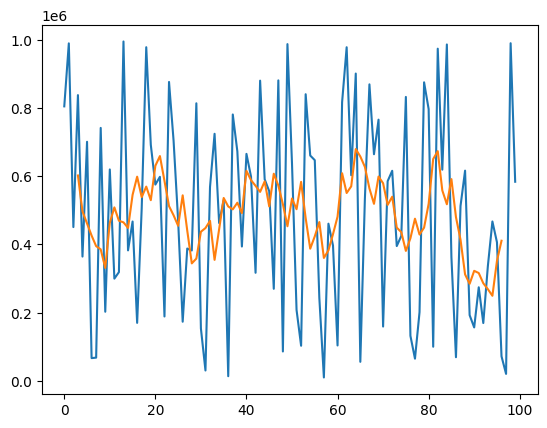

In [ ]:
# 平滑曲线（moving average）
s = pd.Series(np.random.randint(0, 1000000, 100))
plt.plot(s.index, s.values)
r = s.rolling(7, center=True).mean()
plt.plot(r.index, r.values)